##### Dataset complete info: https://archive.ics.uci.edu/ml/datasets/car+evaluation

## Attribute information

* Class Values:

    unacc, acc, good, vgood

* Attributes:

    1. buying: vhigh, high, med, low.
    2. maint: vhigh, high, med, low.
    3. doors: 2, 3, 4, 5more.
    4. persons: 2, 4, more.
    5. lug_boot: small, med, big.
    6. safety: low, med, high.



In [72]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import plot_tree
%matplotlib inline


In [2]:
car_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

In [3]:
pd.read_csv(car_data, header=None)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
columns = ["buying","maint", "doors", "persons", "lug_boot","safety", "class values"]

In [5]:
data = pd.read_csv(car_data, names=columns)
data[:3]

,buying,maint,doors,persons,lug_boot,safety,class values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc


In [6]:
data.dtypes

buying          object
maint           object
doors           object
persons         object
lug_boot        object
safety          object
class values    object
dtype: object

In [7]:
data = data.replace({'vhigh': 4, 'high': 3, 'med': 2, 'low': 1})
data = data.replace({'small': 1, 'big': 3})
data = data.replace({'5more': 5, 'more': 5, '2': 2, '3': 3, '4': 4})
data['class values'] = data['class values'].map({'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3})

In [8]:
data[:3]

,buying,maint,doors,persons,lug_boot,safety,class values
0,4,4,2,2,1,1,0
1,4,4,2,2,1,2,0
2,4,4,2,2,1,3,0


In [9]:
data.dtypes

buying          int64
maint           int64
doors           int64
persons         int64
lug_boot        int64
safety          int64
class values    int64
dtype: object

## Get Target and Features

In [10]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]

In [11]:
print(X.shape)
X[:3]

(1728, 6)


,buying,maint,doors,persons,lug_boot,safety
0,4,4,2,2,1,1
1,4,4,2,2,1,2
2,4,4,2,2,1,3


In [12]:
print(y.shape)
y[:3]

(1728,)


0    0
1    0
2    0
Name: class values, dtype: int64

## Full data in Histogram plot

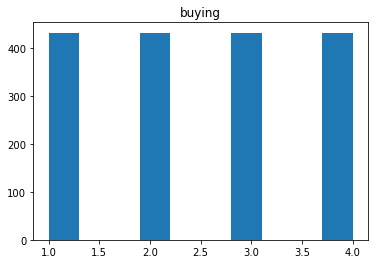

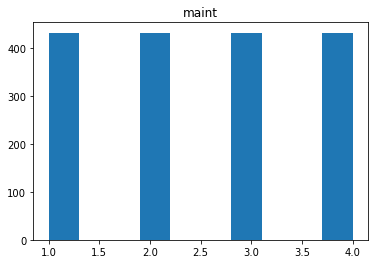

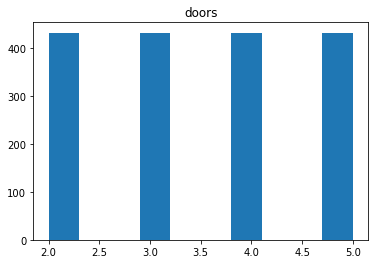

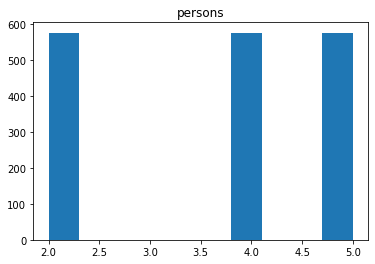

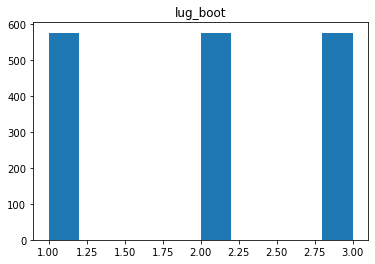

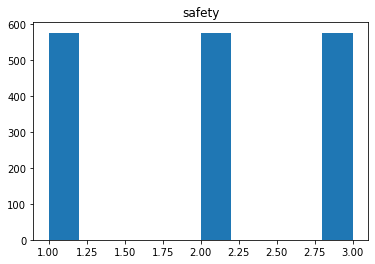

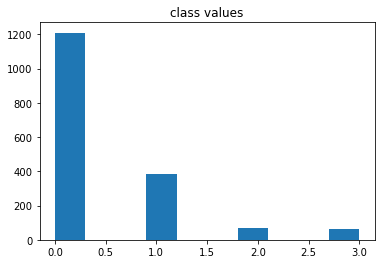

In [13]:
for col_name in data.columns:
        plt.figure()
        plt.hist(data[col_name])
        plt.title(col_name)

## Split and Decision Tree 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [15]:
print(X_train.shape)
print(X_train[:3])
print(y_train.shape)
print(X_test[:3])
print(X_test.shape)
print(y_train[:3])
print(y_test.shape)
print(y_test[:3])

(1209, 6)
      buying  maint  doors  persons  lug_boot  safety
1178       2      2      5        4         3       3
585        3      3      3        5         1       1
1552       1      2      3        4         2       2
(1209,)
      buying  maint  doors  persons  lug_boot  safety
599        3      3      4        2         2       3
1201       2      1      2        4         2       2
628        3      3      5        2         3       2
(519, 6)
1178    3
585     0
1552    1
Name: class values, dtype: int64
(519,)
599     0
1201    1
628     0
Name: class values, dtype: int64


In [16]:
dt_clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_clf_fit = dt_clf.fit(X_train, y_train)
dt_clf_fit

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [17]:
# checking  max features
dt_clf.max_features_

6

In [18]:
# checking classes
dt_clf.classes_

array([0, 1, 2, 3], dtype=int64)

In [19]:
# checking tree
dt_clf.tree_

[Text(0.6154661016949152, 0.9615384615384616, 'safety <= 1.5\nentropy = 1.192\nsamples = 1209\nvalue = [852, 266, 50, 41]\nclass = unacc'),
 Text(0.5985169491525424, 0.8846153846153846, 'entropy = 0.0\nsamples = 407\nvalue = [407, 0, 0, 0]\nclass = unacc'),
 Text(0.6324152542372882, 0.8846153846153846, 'persons <= 3.0\nentropy = 1.469\nsamples = 802\nvalue = [445, 266, 50, 41]\nclass = unacc'),
 Text(0.6154661016949152, 0.8076923076923077, 'entropy = 0.0\nsamples = 260\nvalue = [260, 0, 0, 0]\nclass = unacc'),
 Text(0.649364406779661, 0.8076923076923077, 'buying <= 2.5\nentropy = 1.632\nsamples = 542\nvalue = [185, 266, 50, 41]\nclass = acc'),
 Text(0.4088983050847458, 0.7307692307692307, 'maint <= 2.5\nentropy = 1.74\nsamples = 264\nvalue = [34, 139, 50, 41]\nclass = acc'),
 Text(0.211864406779661, 0.6538461538461539, 'safety <= 2.5\nentropy = 1.778\nsamples = 129\nvalue = [7, 41, 50, 31]\nclass = good'),
 Text(0.09322033898305085, 0.5769230769230769, 'lug_boot <= 1.5\nentropy = 1.2\n

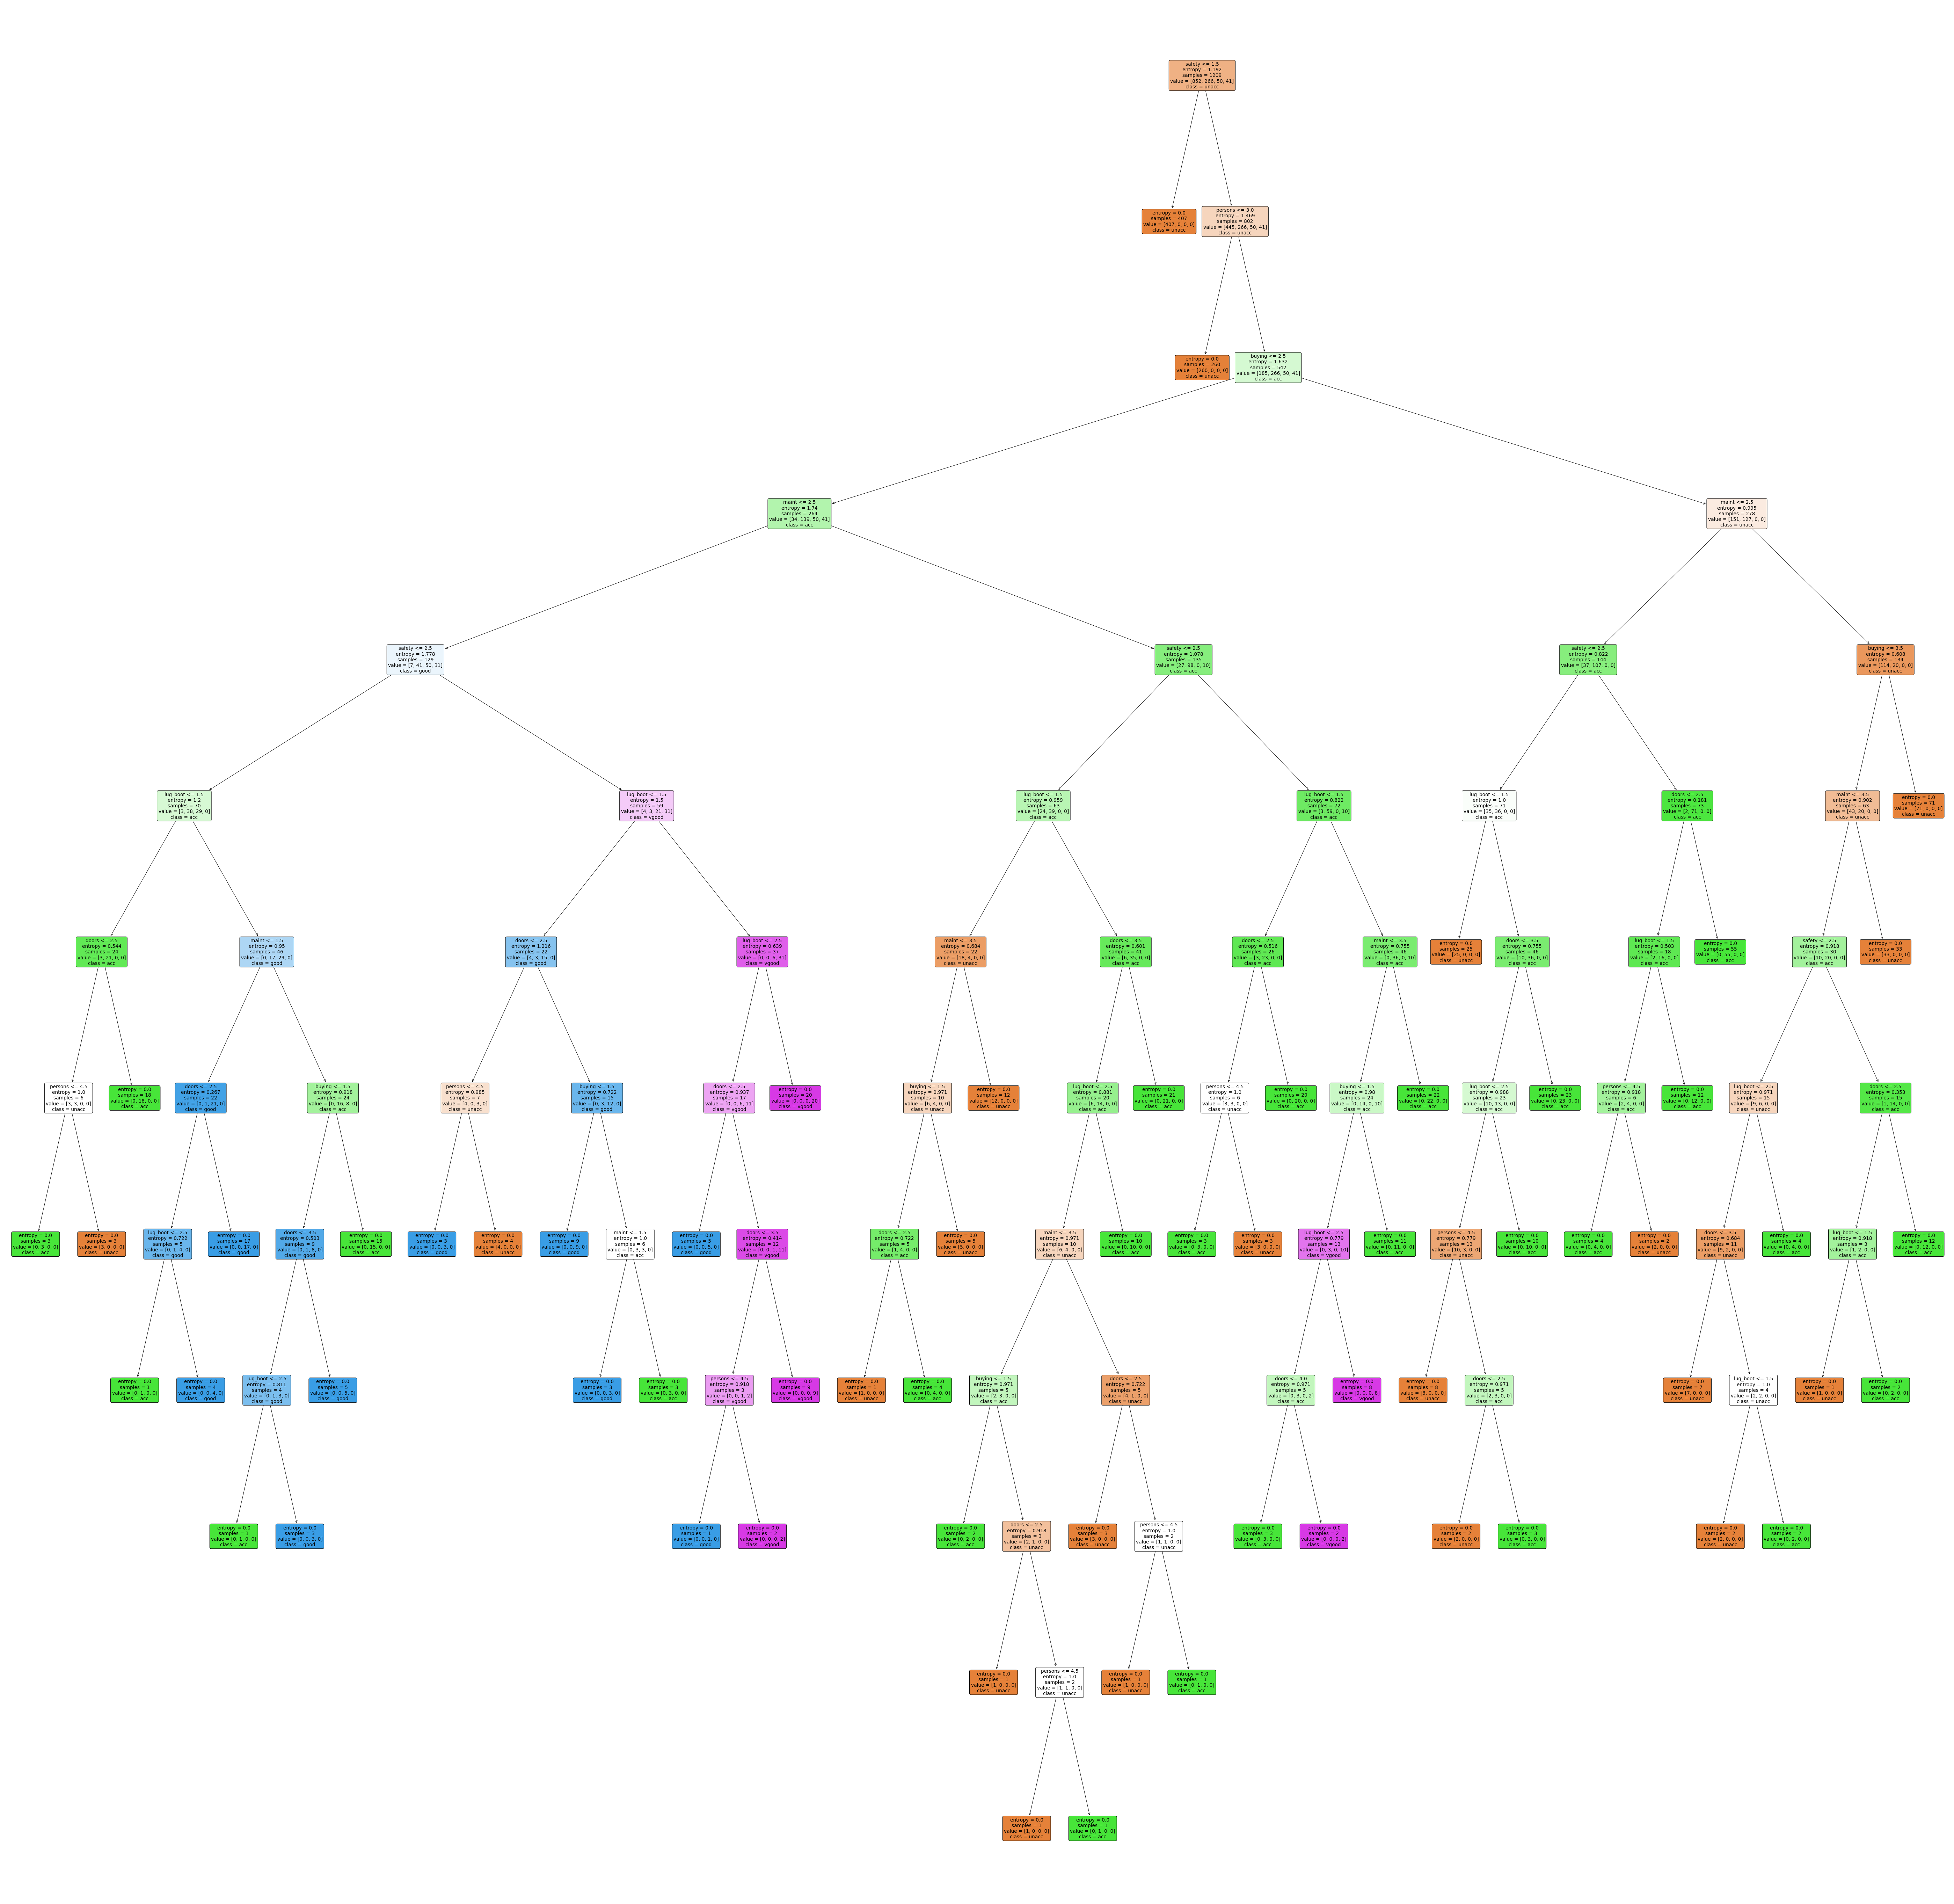

In [20]:
# plotting the decision tree
plt.figure(figsize=(100, 100))
plot_tree(dt_clf,
          filled=True,
          rounded=True,
          impurity=True,
          class_names=['unacc', 'acc', 'good', 'vgood'],
         feature_names=X.columns)

## Confusion Matrix

C:\Users\ritth\software\anaconda\envs\strive\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


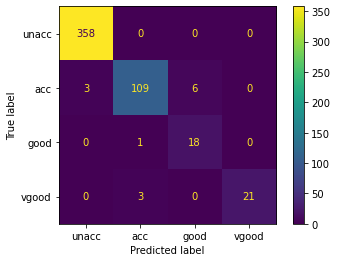

In [21]:
plot_confusion_matrix(dt_clf, X_test, y_test, display_labels=['unacc', 'acc', 'good', 'vgood'])

## Predictting and checking 

In [22]:
# Predicting the test set result  
y_pred = dt_clf.predict(X_test)
print(y_pred[:3])
print(y_pred.shape)

[0 1 0]
(519,)


In [26]:
# check accuracy
(y_pred == y_test).sum()/ len(y_test)

0.9749518304431599

In [27]:
# check with cross validate
cv = cross_validate(dt_clf, X_train, y_train, cv = 5)
cv

{'fit_time': array([0.00799775, 0.00800204, 0.00800991, 0.00799608, 0.01601005]),
 'score_time': array([0.00800014, 0.00800061, 0.00800347, 0.00800037, 0.        ]),
 'test_score': array([0.97107438, 0.97933884, 0.97520661, 0.98347107, 0.9626556 ])}

## GridSearchCV

In [81]:
dt_clf.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [68]:
parameters = {
                'criterion':('gini', 'entropy'),
                'max_depth':[5,7,15,21], 
                'splitter':('best', 'random'),
                'max_features':('auto', 'sqrt', 'log2')
              }
            
grd = GridSearchCV(dt_clf, parameters)
grid_train = grd.fit(X_train, y_train)
grid_train

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [5, 7, 15, 21],
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'splitter': ('best', 'random')})

In [69]:
# checking with different attributes
best_param = grd.best_params_
best_param

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'auto',
 'splitter': 'best'}

In [70]:
accuracy = grd.best_score_
accuracy

0.9321731079181099

## Random Forest

In [40]:
rf_clf = RandomForestClassifier(n_estimators=4)
rf_clf_fit = rf_clf.fit(X_train, y_train)
rf_clf_fit

RandomForestClassifier(n_estimators=4)

In [42]:
# preditting the result
rf_pred = rf_clf.predict(X_test) 
rf_pred[:3]

array([0, 1, 0], dtype=int64)

In [43]:
(rf_pred == y_test).sum() / len(y_test)

0.9171483622350675

In [44]:
# check with cross validation
rf_cv = cross_validate(rf_clf, X_train, y_train, cv = 5)
rf_cv

{'fit_time': array([0.02320218, 0.02401137, 0.02400875, 0.01600242, 0.01600599]),
 'score_time': array([0.00797081, 0.0079999 , 0.00800109, 0.00799894, 0.00800419]),
 'test_score': array([0.93801653, 0.93801653, 0.90082645, 0.91735537, 0.94190871])}

## GridSearchCV for RD

In [80]:
rf_clf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [87]:
parameters = {
                'criterion':('gini', 'entropy'),
                'max_depth':[5,7,15,21], 
                'max_features':('auto', 'sqrt', 'log2')
              }
            
grd = GridSearchCV(rf_clf, parameters)
grid_train = grd.fit(X_train, y_train)
grid_train

GridSearchCV(estimator=RandomForestClassifier(n_estimators=4),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [5, 7, 15, 21],
                         'max_features': ('auto', 'sqrt', 'log2')})

In [88]:
best_param2 = grd.best_params_
best_param2

{'criterion': 'entropy', 'max_depth': 21, 'max_features': 'auto'}

In [89]:
accuracy2 = grd.best_score_
accuracy2

0.9487260382017076

## StandardScaler the data before random forest

In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
print(X_test_scaled)
print(X_train_scaled)

[[ 0.44240432  0.44136142  0.45821351 -1.3590272   0.00503713  1.213459  ]
 [-0.45352001 -1.35529163 -1.31736385  0.25975495  0.00503713 -0.00301855]
 [ 0.44240432  0.44136142  1.34600219 -1.3590272   1.22301629 -0.00301855]
 ...
 [ 1.33832864 -0.45696511  0.45821351  0.25975495  1.22301629  1.213459  ]
 [-1.34944433 -1.35529163 -1.31736385  1.06914603 -1.21294202 -0.00301855]
 [-1.34944433 -1.35529163  1.34600219  0.25975495  0.00503713 -0.00301855]]
[[-0.45352001 -0.45696511  1.34600219  0.25975495  1.22301629  1.213459  ]
 [ 0.44240432  0.44136142 -0.42957517  1.06914603 -1.21294202 -1.21949611]
 [-1.34944433 -0.45696511 -0.42957517  0.25975495  0.00503713 -0.00301855]
 ...
 [ 0.44240432 -1.35529163  1.34600219  1.06914603  0.00503713  1.213459  ]
 [-1.34944433  0.44136142  0.45821351 -1.3590272  -1.21294202 -0.00301855]
 [-0.45352001 -0.45696511 -0.42957517  1.06914603 -1.21294202 -0.00301855]]


## LDA

In [54]:
lda = LinearDiscriminantAnalysis()
lda_fit_tr = lda.fit_transform(X_train_scaled, y_train)
lda_tr = lda.transform(X_test_scaled)

In [55]:
print(lda_fit_tr)
print(lda_tr)

[[ 2.36784038  0.04138897 -1.18701676]
 [-1.10777074  0.56491087  1.63778618]
 [ 1.03615813 -1.14328428  0.16225973]
 ...
 [ 2.60284742  0.52114925  0.54815465]
 [-0.93413985 -0.88607842 -0.0646304 ]
 [ 0.88269635 -0.1464677   1.5622867 ]]
[[-0.3363645   0.55826014 -1.0559763 ]
 [ 0.82861372 -1.23574278  0.73485502]
 [-0.97221378  0.19805471 -1.81439849]
 ...
 [ 1.3137076   1.05551701 -0.83259482]
 [ 1.59139106 -1.41798671  1.90093979]
 [ 1.70041429 -1.33047564  0.25644468]]


In [56]:
# check with RD
rf_clf2 = RandomForestClassifier()
rf_clf_fit_2 = rf_clf2.fit(lda_fit_tr, y_train)
rf_clf_fit_2

RandomForestClassifier()

In [59]:
# check predict
pred2 = rf_clf2.predict(lda_tr)
pred2[:3]

array([0, 0, 0], dtype=int64)

In [71]:
# calculate the score
score = rf_clf2.score(lda_tr, y_test)
score

0.8805394990366089

## PCA

In [73]:
pca = PCA()
pca_fit = pca.fit_transform(X_train_scaled, y_train)
pca_tr = pca.transform(X_test_scaled)

In [74]:
print(pca_fit)
print(pca_tr)

[[-1.0804122   0.3985913   1.24627006 -1.35780641 -0.28219496 -0.67772915]
 [ 1.11573766 -0.9962387  -1.07538331  0.18645259  1.09117439  0.23935579]
 [-0.82320298 -0.27524249 -0.84139761  0.06003728 -0.37967578 -0.82020081]
 ...
 [-0.42656389 -0.42719372  0.51604809 -2.36248543 -0.33522119  0.36793032]
 [-1.02107071  1.5339336  -1.24894097  0.46394398  0.54482002  0.27656431]
 [ 0.27464986 -0.6465469  -1.48900187 -0.69415975  0.01129034 -0.14413812]]
[[ 0.03544267  1.71358411  0.64227072 -0.11823678 -0.46265472  0.58461652]
 [-0.32462949 -1.04240477 -0.81428504  0.19289592 -1.39374552 -0.10326131]
 [-0.77075578  0.99111164  1.83800426  0.38344751  0.47732905  0.4641927 ]
 ...
 [ 0.43359928 -0.04527044  1.77191686 -1.04344744 -0.88747159  0.19871846]
 [-0.36964355 -1.15134905 -2.29372235 -0.42333779 -0.93238093 -0.4854084 ]
 [-2.00949666 -0.36671988 -0.31164282 -1.09508931  0.2460882  -0.08707969]]


In [75]:
# check with RD
rf_clf3 = RandomForestClassifier()
rf_clf_fit_3 = rf_clf3.fit(pca_fit, y_train)
rf_clf_fit_3

RandomForestClassifier()

In [76]:
# check predict
pred3 = rf_clf3.predict(pca_tr)
pred3[:3]

array([0, 0, 0], dtype=int64)

In [77]:
# calculate the score
score = rf_clf3.score(pca_tr, y_test)
score

0.8689788053949904